# Blood donation analysis - Udemy

https://www.udemy.com/course/data-science-in-healthcare/

Problem showing the danger of a majority class imbalance.

In the initial data most of the rows are positive for the predictor, yielding some unreliable predictions.  Then apply SMOTE to redress this imbalance and the accuracy increases.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from plot_confusion_matrix import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
train = pd.read_csv('C:/ML/blood donation analysis/blood-train.csv')
test = pd.read_csv('C:/ML/blood donation analysis/blood-test.csv')

In [3]:
print('Train:{}, test:{}'.format(train.shape, test.shape))

Train:(576, 6), test:(200, 5)


In [4]:
y = train['Made Donation in March 2007']
X = train.drop(['Unnamed: 0', 'Made Donation in March 2007'], axis=1)
test = test.drop('Unnamed: 0', axis=1)

In [5]:
print('Initial dataset shape %s' % Counter(y))

Initial dataset shape Counter({0: 438, 1: 138})


In [6]:
X.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


In [7]:
test.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,200.00000,200.000000,200.000000,200.000000
mean,9.49500,5.935000,1483.750000,35.475000
std,7.61907,6.125224,1531.305955,25.111197
min,0.00000,1.000000,250.000000,2.000000
25%,4.00000,2.000000,500.000000,14.000000
50%,7.00000,4.000000,1000.000000,31.000000
75%,14.00000,8.000000,2000.000000,52.000000
max,40.00000,41.000000,10250.000000,98.000000


In [8]:
X.columns

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation'],
      dtype='object')

In [9]:
X = X.drop(['Total Volume Donated (c.c.)'], axis=1)
X

,Months since Last Donation,Number of Donations,Months since First Donation
0,2,50,98
1,0,13,28
2,1,16,35
3,2,20,45
4,1,24,77
...,...,...,...
571,23,1,23
572,16,3,86
573,21,2,52
574,39,1,39


In [10]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
lr = LogisticRegression(random_state=1223)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

0.75
0.5857142857142857


accuracy  0.646551724137931
roc auc  0.5278659611992945


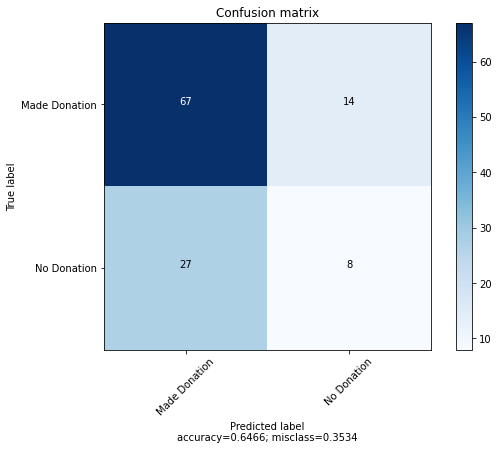

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print('accuracy ', accuracy_score(y_test, y_pred))
print('roc auc ', roc_auc_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, target_names=['Made Donation', 'No Donation'], normalize=False)

accuracy  0.7068965517241379
roc auc  0.5223985890652557


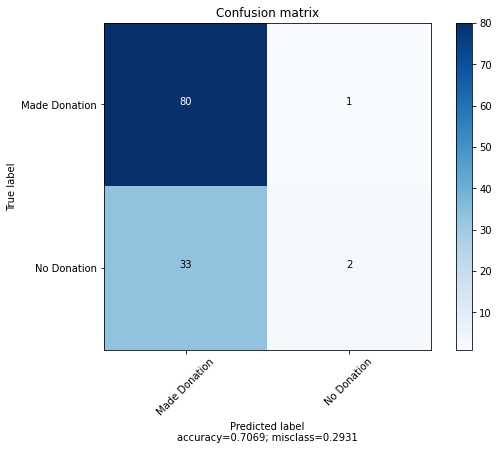

In [14]:
svmc = SVC(probability=True)
svmc.fit(X_train, y_train)

y_pred = svmc.predict(X_test)
print('accuracy ', accuracy_score(y_test, y_pred))
print('roc auc ', roc_auc_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, target_names=['Made Donation', 'No Donation'], normalize=False)

accuracy  0.75
roc auc  0.6343915343915344


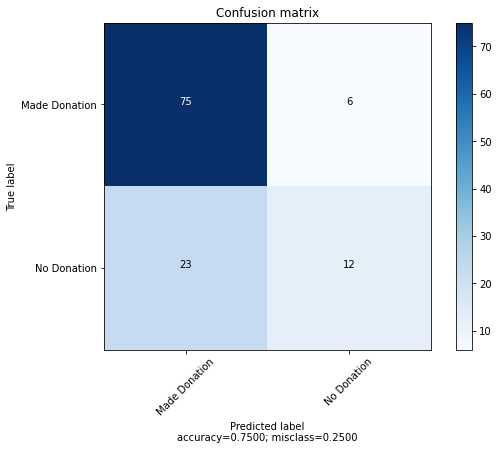

In [15]:
rf = RandomForestClassifier(n_estimators=300, max_depth=7)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('accuracy ', accuracy_score(y_test, y_pred))
print('roc auc ', roc_auc_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, target_names=['Made Donation', 'No Donation'], normalize=False)

accuracy  0.75
roc auc  0.6181657848324514


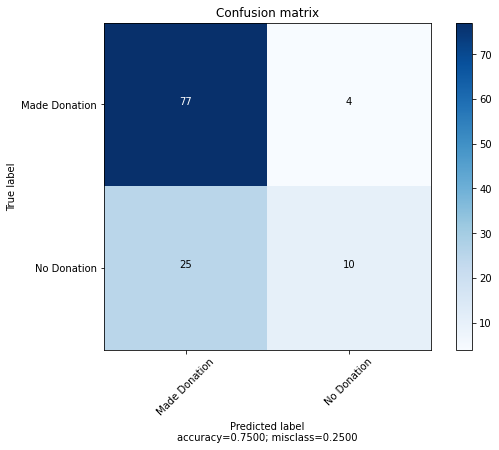

In [16]:
ann = MLPClassifier(random_state=1, hidden_layer_sizes=(100), max_iter=1000)
ann.fit(X_train, y_train)

y_pred = ann.predict(X_test)
print('accuracy ', accuracy_score(y_test, y_pred))
print('roc auc ', roc_auc_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, target_names=['Made Donation', 'No Donation'], normalize=False)

In [17]:
# apply SMOTE (synthetic minority overbalance technique)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [18]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 438, 0: 438})


In [19]:
X_res = ss.fit_transform(X_res)
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

accuracy  0.8125
roc auc  0.812532299741602


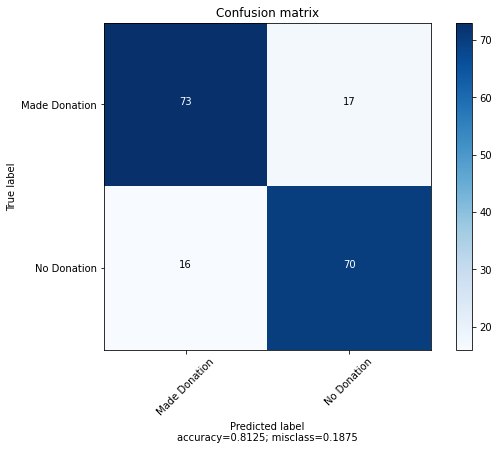

In [20]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_res_train, y_res_train)

y_res_pred = rf.predict(X_res_test)
print('accuracy ', accuracy_score(y_res_test, y_res_pred))
print('roc auc ', roc_auc_score(y_res_test, y_res_pred))
cm = confusion_matrix(y_res_test, y_res_pred)
plot_confusion_matrix(cm, target_names=['Made Donation', 'No Donation'], normalize=False)

accuracy  0.7159090909090909
roc auc  0.7157622739018088


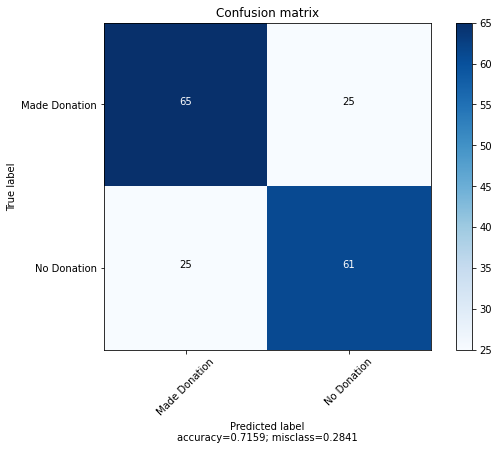

In [21]:
ann = MLPClassifier(random_state=1, hidden_layer_sizes=(100,100,100), max_iter=1000)
ann.fit(X_res_train, y_res_train)

y_res_pred = ann.predict(X_res_test)
print('accuracy ', accuracy_score(y_res_test, y_res_pred))
print('roc auc ', roc_auc_score(y_res_test, y_res_pred))
cm = confusion_matrix(y_res_test, y_res_pred)
plot_confusion_matrix(cm, target_names=['Made Donation', 'No Donation'], normalize=False)